In [14]:
import nashpy as nash
import numpy as np

In [4]:
A = [[3, 1], [0, 2]]
B = [[2, 1], [0, 3]]
bofts = nash.Game(A, B)

In [5]:
bofts

Bi matrix game with payoff matrices:

Row player:
[[3 1]
 [0 2]]

Column player:
[[2 1]
 [0 3]]

In [7]:
A = [[1, -1], [-1, 1]]
B = [[-1, 1], [1, -1]]
matching_pennies = nash.Game(A, B)

In [8]:
matching_pennies

Zero sum game with payoff matrices:

Row player:
[[ 1 -1]
 [-1  1]]

Column player:
[[-1  1]
 [ 1 -1]]

In [10]:
sigma_r =  np.array([.8, .2])
sigma_c = np.array([.6, .4])

In [13]:
matching_pennies[sigma_r, sigma_c]

array([ 0.12, -0.12])

In [15]:
A = np.array([[1, 1, -1],[2,-1, 0]])
B = np.array([[1/2, -1, -1/2],[-1, 3, 2]])

game = nash.Game(A, B)
game

Bi matrix game with payoff matrices:

Row player:
[[ 1  1 -1]
 [ 2 -1  0]]

Column player:
[[ 0.5 -1.  -0.5]
 [-1.   3.   2. ]]

In [17]:
eqs = game.support_enumeration()

In [18]:
type(eqs)

generator

In [19]:
for eq in eqs:
    print(eq)

(array([0.66666667, 0.33333333]), array([-0.        ,  0.33333333,  0.66666667]))


In [20]:
#generator, once used, cannot be reused.
eqs = game.support_enumeration()

In [21]:
list(eqs)

[(array([0.66666667, 0.33333333]),
  array([-0.        ,  0.33333333,  0.66666667]))]

In [22]:
eqs = game.vertex_enumeration()

In [23]:
list(eqs)

[(array([0.66666667, 0.33333333]),
  array([-1.85037171e-17,  3.33333333e-01,  6.66666667e-01]))]

In [24]:
#Lemke-Howson algorithm 
A = [[3, 1], [0, 2]]
B = [[2, 1], [0, 3]]
bofts = nash.Game(A, B)

In [50]:
bofts

Bi matrix game with payoff matrices:

Row player:
[[3 1]
 [0 2]]

Column player:
[[2 1]
 [0 3]]

In [27]:
bofts.lemke_howson(initial_dropped_label=0)

(array([1., 0.]), array([1., 0.]))

In [30]:
for label in range(4):
    print(bofts.lemke_howson(initial_dropped_label=label))

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))


In [31]:
eqs = bofts.lemke_howson_enumeration

In [33]:
list(eq)

[array([0.66666667, 0.33333333]),
 array([-0.        ,  0.33333333,  0.66666667])]

In [34]:
import axelrod as axl

In [41]:
#Prisioner's Dilemma
players = (axl.TitForTat(), axl.Alternator())
match = axl.Match(players, 6)
match.play()

[(C, C), (C, D), (D, C), (C, D), (D, C), (C, D)]

In [42]:
match.final_score_per_turn()

(2.1666666666666665, 3.0)

In [45]:
players = [s() for s in axl.demo_strategies]
tournament = axl.Tournament(players = players, turns = 10, repetitions = 5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 169.88it/s]


In [46]:
%matplotlib inline

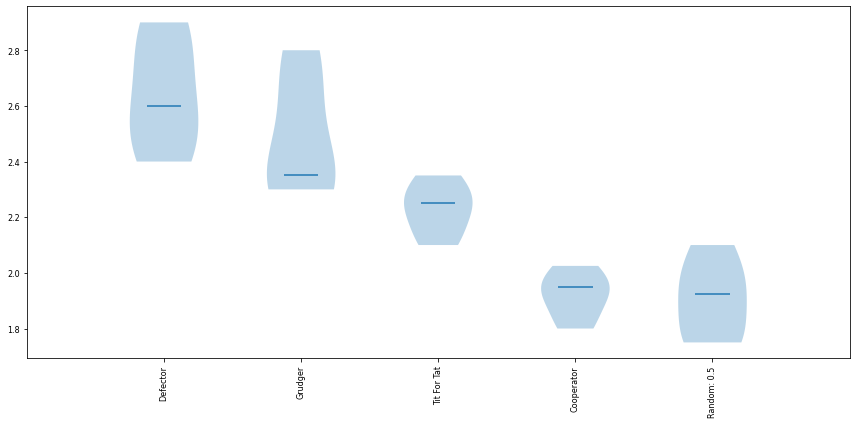

In [49]:
plot = axl.Plot(results)
plot.boxplot();

In [58]:
#Infinite population games 
import scipy 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [52]:
def dx(x, t, A):
    f = np.dot(A, x)
    phi = np.dot(f, x)
    return x * (f-phi)
    
    

In [56]:
t = np.linspace(0, 10, 100)
A = np.array([[4, 3, 2],[2, 1, 5], [6, 0, 3]])
xs = odeint(func=dx, y0=[1/3, 1/3, 1/3], t=t, args=(A,))

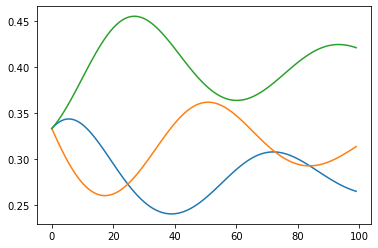

In [60]:
plt.plot(xs);

In [63]:
#Finite population games Moran Processes 
def moran(N, game, i=1, seed=0):
    """
    Return the population counts for 
    the Moran process on 2 by 2 game
    """
    population = [0 for _ in range(i)] + [1 for _ in range(N-i)]# i number of 0s, and N-i number of 1s
    counts = [(population.count(0), population.count(1))]
    
    np.random.seed(seed)
    
    while len(set(population))== 2:
        scores = []
        
        for i, player in enumerate(population):
            total = 0
            for j, opponent in enumerate(population):#for all players to play every other player
                if i != j:
                    total += game[player, opponent]
            scores.append(total)
        
        total_score= sum(scores)
        probs = [score/total_score for score in scores]
        rep_index = np.random.choice(range(N), p=probs)
        
        elim_index = np.random.randint(N)
        population[elim_index] = population[rep_index]
        
        counts.append((population.count(0), population.count(1)))
    return counts 

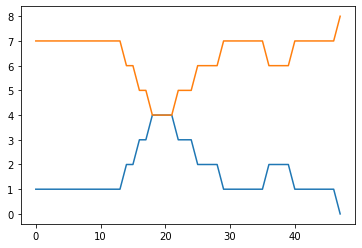

In [71]:
N = 8 
A = np.array([[4, 1], [1, 4]])
counts = moran(N=N, game=A, seed=17)
plt.plot(counts);